In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# SF Temps

In [2]:
from vega_datasets import data
sf_temps = data.sf_temps()
sf_temps = sf_temps.set_index('date').sort_index()
sf_temps

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


Resample by the day and take the average temperature. Visualize the average temperature over time.

<AxesSubplot:xlabel='date'>

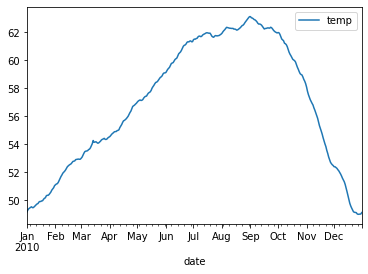

In [3]:
sf_temps.resample('D').mean().plot()

Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:xlabel='date'>

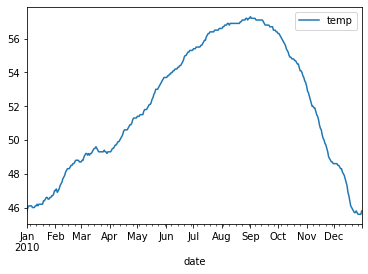

In [4]:
sf_temps.resample('D').min().plot()

Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

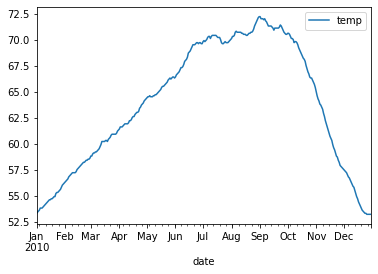

In [5]:
sf_temps.resample('D').max().plot()

Which month is the coldest, on average?

In [6]:
sf_temps.resample('M').mean()

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968
2010-06-30,60.444722
2010-07-31,61.765457
2010-08-31,62.405376
2010-09-30,62.487083


In [7]:
month = sf_temps.resample('M').mean().reset_index()
month[['date', 'temp']][month['temp'] == month['temp'].min()]

,date,temp
0,2010-01-31,49.98414


Which month has the highest average temperature?

In [8]:
month[['date', 'temp']][month['temp'] == month['temp'].max()]

,date,temp
8,2010-09-30,62.487083


Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [9]:
day = sf_temps['temp'].resample('D').agg(['max', 'min'])
day['variation'] = day['max'] - day['min']
month = day[['variation']].resample('M').mean()
month[['variation']][month['variation'] == month['variation'].max()]

,variation
date,
2010-09-30,14.403333


In [30]:
day = sf_temps['temp'].resample('D').agg(['max', 'min'])
day['variation'] = day['max'] - day['min']
day[['variation']][day['variation'] == day['variation'].max()]

,variation
date,
2010-08-31,15.0


Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

<AxesSubplot:xlabel='date'>

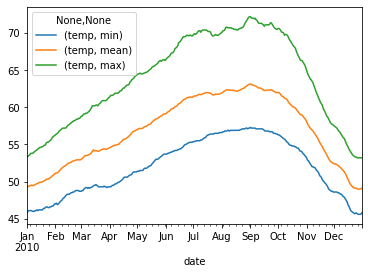

In [10]:
sf_temps.resample('D').agg(['min', 'mean', 'max']).plot()

# Seattle Weather

In [11]:
from vega_datasets import data
seattle = data.seattle_weather()
seattle = seattle.set_index('date').sort_index()
seattle

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog
2015-12-28,1.5,5.0,1.7,1.3,fog
2015-12-29,0.0,7.2,0.6,2.6,fog


Which year and month combination has the highest amount of precipitation?

In [12]:
month = seattle.resample('M').sum()
month[['precipitation']][month['precipitation'] == month['precipitation'].max()]

,precipitation
date,
2015-12-31,284.5


Visualize the amount of monthly precipitation over time.

<AxesSubplot:xlabel='date'>

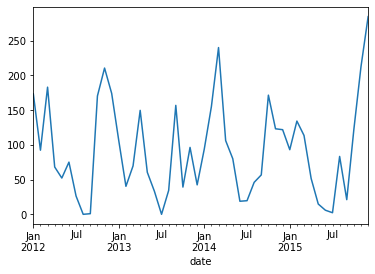

In [13]:
seattle['precipitation'].resample('M').sum().plot()

Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<AxesSubplot:xlabel='date'>

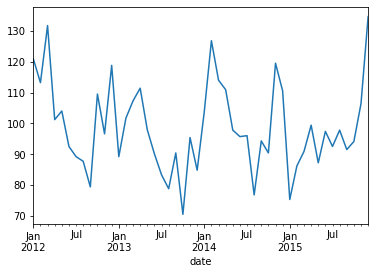

In [14]:
seattle['wind'].resample('M').sum().plot()

Which year-month combination is the windiest?

In [15]:
month[['wind']][month['wind'] == month['wind'].max()]

,wind
date,
2015-12-31,134.6


What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [16]:
seattle['is_sunny'] = seattle['weather'] == 'sun'
sunny = seattle[['is_sunny']].resample('Y').sum()
sunny[sunny['is_sunny'] == sunny['is_sunny'].max()]

,is_sunny
date,
2014-12-31,211


In which month does it rain the most?

In [39]:
seattle['raining'] = seattle['weather'] == 'rain'
seattle['month'] = seattle.index.month
seattle.groupby('month')[['raining']].sum().sort_values(by='raining', ascending=False).head(1)

,raining
month,
2,40


Which month has the most number of days with a non-zero amount of precipitation?


In [36]:
seattle['has_precipitation'] = seattle['precipitation'] > 0
seattle.groupby('month')[['has_precipitation']].mean().sort_values(by='has_precipitation', ascending=False).head(1)

,has_precipitation
month,
12,0.653226


# Flights

In [19]:
flights = data.flights_20k()
# flights = flights.set_index('date').sort_index()
flights

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,-6,1489,SEA,MCI
19997,2001-02-07 11:37:00,-16,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


Convert any negative delays to 0.

In [20]:
flights['delay'][flights['delay'] < 0] = 0
flights

<ipython-input-20-f1e8a1670d6f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights['delay'][flights['delay'] < 0] = 0


,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,0,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,0,550,MSY,MCO
4,2001-03-30 21:45:00,0,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,0,1489,SEA,MCI
19997,2001-02-07 11:37:00,0,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


Which hour of the day has the highest average delay?

In [21]:
flights['hour'] = flights.date.dt.hour
flights.groupby('hour')[['delay']].mean().sort_values('delay', ascending=False).head(1)

,delay
hour,
3,302.5


Does the day of the week make a difference in the delay amount?

In [22]:
flights['day'] = flights.date.dt.day_name()
flights.groupby(['day', 'hour'])[['delay']].mean().sort_values('delay', ascending=False)

,,delay
day,hour,
Friday,3,360.000000
Sunday,0,260.000000
Tuesday,3,245.000000
Thursday,0,184.333333
Friday,1,170.000000
...,...,...
Saturday,5,1.000000
Wednesday,5,0.000000
Tuesday,5,0.000000


Does the month make a difference in the delay amount?

In [23]:
flights['month'] = flights.date.dt.month
flights.groupby(['month', 'hour'])[['delay']].mean().sort_values('delay', ascending=False)

delay
month hour            
2     3     360.000000
1     3     245.000000
      1     170.000000
2     0     167.000000
3     0     123.500000
...                ...
2     6       2.375405
3     6       2.360947
1     5       0.777778
3     5       0.705882
2     5       0.000000

[63 rows x 1 columns]

# Bonus

In [24]:
from vega_datasets import data
iowa = data.iowa_electricity()
iowa

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883
5,2006-01-01,Fossil Fuels,37014
6,2007-01-01,Fossil Fuels,41389
7,2008-01-01,Fossil Fuels,42734
8,2009-01-01,Fossil Fuels,38620
9,2010-01-01,Fossil Fuels,42750


For each row, calculate the percentage of the year's total that energy source provided.

In [25]:
iowa['year_'] = iowa.year.dt.year
year = iowa.groupby('year_')[['net_generation']].sum()
iowa = iowa.merge(year, how='left', on='year_')
iowa.columns = ['year', 'source', 'net_generation', 'year_', 'total_gen_year']
iowa['percent_gen'] = iowa['net_generation']/iowa['total_gen_year']*100
iowa

,year,source,net_generation,year_,total_gen_year,percent_gen
0,2001-01-01,Fossil Fuels,35361,2001,40651,86.986790
1,2002-01-01,Fossil Fuels,35991,2002,42528,84.628950
2,2003-01-01,Fossil Fuels,36234,2003,42107,86.052200
3,2004-01-01,Fossil Fuels,36205,2004,43236,83.738089
4,2005-01-01,Fossil Fuels,36883,2005,44145,83.549666
5,2006-01-01,Fossil Fuels,37014,2006,45473,81.397753
6,2007-01-01,Fossil Fuels,41389,2007,49778,83.147173
7,2008-01-01,Fossil Fuels,42734,2008,53086,80.499567
8,2009-01-01,Fossil Fuels,38620,2009,51859,74.471162
9,2010-01-01,Fossil Fuels,42750,2010,57509,74.336191


Lineplot of generation over time, color by source

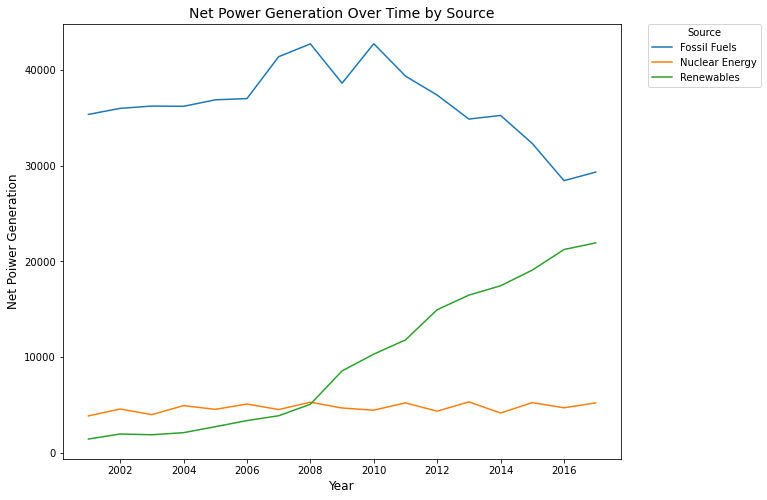

In [26]:
plt.figure(figsize=(10,8))
sns.lineplot(data=iowa, x='year_', y='net_generation', hue='source')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Net Poiwer Generation', fontsize=12)
plt.title('Net Power Generation Over Time by Source', fontsize=14)
plt.legend(bbox_to_anchor=(1.25, 1),borderaxespad=0, title='Source')

Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)

In [27]:
gen_pivot=pd.pivot_table(iowa, columns='year_', index='source', values='net_generation')
gen_pivot

year_,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
source,,,,,,,,,,,,,,,,,
Fossil Fuels,35361,35991,36234,36205,36883,37014,41389,42734,38620,42750,39361,37379,34873,35250,32319,28437,29329
Nuclear Energy,3853,4574,3988,4929,4538,5095,4519,5282,4679,4451,5215,4347,5321,4152,5243,4703,5214
Renewables,1437,1963,1885,2102,2724,3364,3870,5070,8560,10308,11795,14949,16476,17452,19091,21241,21933


Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?

**Answer** Same as line plot above

Is the total generation increasing over time?

<AxesSubplot:xlabel='year_'>

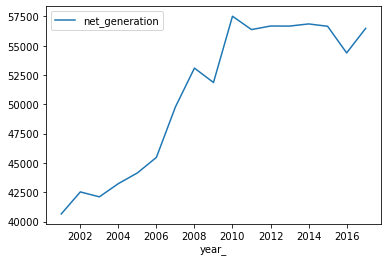

In [28]:
year.plot()

How would you control for increasing consumption over time when considering how much energy is coming from each source?
express each number as a % of the year's total

**Answer** - We don't have the amount of consumption; however, if we were to have the amount of consumption then we would be able to simply sum the consumption and divide it by the totle of net energey produced each year

In [29]:
iowa[['year_', 'source', 'percent_gen']]

,year_,source,percent_gen
0,2001,Fossil Fuels,86.986790
1,2002,Fossil Fuels,84.628950
2,2003,Fossil Fuels,86.052200
3,2004,Fossil Fuels,83.738089
4,2005,Fossil Fuels,83.549666
5,2006,Fossil Fuels,81.397753
6,2007,Fossil Fuels,83.147173
7,2008,Fossil Fuels,80.499567
8,2009,Fossil Fuels,74.471162
9,2010,Fossil Fuels,74.336191
